# Car Price Prediction

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [166]:
%%HTML  
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

## 1. Loading Dataset

In [167]:
pd.set_option('float_format', '{:f}'.format)           #Format to convert into floating type
df = pd.read_csv(r'F:\Skillovilla Python\ML\autos_small.csv')   #Loading data
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [168]:
df.shape             

(10000, 11)

In [169]:
df.columns

Index(['price', 'name', 'yearOfRegistration', 'monthOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'vehicleType'],
      dtype='object')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                10000 non-null  int64 
 1   name                 10000 non-null  object
 2   yearOfRegistration   10000 non-null  int64 
 3   monthOfRegistration  10000 non-null  int64 
 4   gearbox              9423 non-null   object
 5   powerPS              10000 non-null  int64 
 6   model                9433 non-null   object
 7   kilometer            10000 non-null  int64 
 8   fuelType             9057 non-null   object
 9   brand                10000 non-null  object
 10  vehicleType          8950 non-null   object
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [171]:
df.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7056.704600,2003.637400,5.737600,122.018900,125034.000000
std,123750.134822,40.424633,3.706794,342.097210,40581.689607
min,0.000000,1000.000000,0.000000,0.000000,5000.000000
25%,1150.000000,1999.000000,3.000000,69.000000,100000.000000
50%,2999.000000,2004.000000,6.000000,105.000000,150000.000000
75%,7250.000000,2008.000000,9.000000,150.000000,150000.000000
max,12345678.000000,5000.000000,12.000000,17322.000000,150000.000000


## Observations:
- We have outliers in the price, kilometer.
- 75% of the price lies below 7250, 75% of vehicles are taken before 2008.
- min value price is 0 which needs to be verified

## 2. Data Cleaning

In [172]:
df.isnull().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [173]:
null_columns = [features for features in df.columns if df[features].isnull().sum()>0] #null_columns

In [174]:
null_columns

['gearbox', 'model', 'fuelType', 'vehicleType']

In [175]:
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [176]:
df_null = df[df.isnull().any(axis=1)]
df_null.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
13,500,Verkaufe_meinen_Goldi,1997,0,manuell,1256,NaN,150000,NaN,audi,kleinwagen
15,149500,Ferrari_458_Italia___Garantie_bis_November_2016,2010,11,automatik,570,NaN,20000,benzin,sonstige_autos,coupe
18,500,Twingo_Schnaeppchen_nur_noch_bis_Montag_angeme...,2017,0,manuell,0,twingo,150000,benzin,renault,NaN
19,199,Opel_B_Corsa_zu_verkaufen,2000,0,manuell,60,corsa,150000,NaN,opel,NaN


In [177]:
#df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [178]:
df.value_counts().index[0]

(10500,
 'A5_3.0_TDI_DPF_quattro_S_tronic_NAVI_XEN_2xS_LINE',
 2011,
 9,
 'automatik',
 239,
 'a5',
 125000,
 'diesel',
 'audi',
 'limousine')

There are 4 columns with null values. Lets see one by one with relevance to the data.

## 3.Strategies to fill the null columns

In [179]:
df['gearbox'].unique() #All unique elements of the column

array(['manuell', 'automatik', nan], dtype=object)

In [180]:
df['gearbox'].value_counts() #All the value_counts from the column

manuell      7314
automatik    2109
Name: gearbox, dtype: int64

In [181]:
df['gearbox'] = df['gearbox'].fillna(df['gearbox'].mode()[0]) #Replacing null values with mode 
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [182]:
df['model'].unique().size

236

In [183]:
df.drop('model',axis=1,inplace=True)

In [184]:
df['fuelType'].unique()

array(['benzin', nan, 'diesel', 'lpg', 'cng', 'hybrid', 'andere',
       'elektro'], dtype=object)

In [185]:
df['fuelType'].value_counts()

benzin     5971
diesel     2913
lpg         147
cng          12
hybrid        7
andere        5
elektro       2
Name: fuelType, dtype: int64

In [186]:
df['fuelType'] = df['fuelType'].fillna(df['fuelType'].mode()[0])
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,150000,diesel,smart,cabrio


In [187]:
df['vehicleType'].unique()

array(['kombi', 'cabrio', 'limousine', 'kleinwagen', 'bus', 'coupe', nan,
       'suv', 'andere'], dtype=object)

In [188]:
df['vehicleType'].value_counts()

limousine     2519
kleinwagen    2143
kombi         1770
bus            847
cabrio         640
coupe          543
suv            388
andere         100
Name: vehicleType, dtype: int64

In [189]:
df['vehicleType'] = df['vehicleType'].fillna(df['vehicleType'].mode()[0])
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,150000,diesel,smart,cabrio


In [190]:
df.isnull().sum()

price                  0
name                   0
yearOfRegistration     0
monthOfRegistration    0
gearbox                0
powerPS                0
kilometer              0
fuelType               0
brand                  0
vehicleType            0
dtype: int64

Now, the null values are cleared, Its time to preprocess the data. In Data preprocessing, we need to remove unnecessary columns for model training and evaluation. Also, transformation of data is done here. Changing categorical data to numerical data

## 4.Data Preprocessing

In [191]:
df.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,125000,benzin,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,150000,diesel,smart,cabrio


In [192]:
df['Period'] = 2022 - df['yearOfRegistration']  #No of years from the year of Registration
df.head() 

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,Ford_Escort,1992,8,manuell,89,60000,benzin,ford,kombi,30
1,3500,Bmw_320_cabrio,1996,0,manuell,150,125000,benzin,bmw,cabrio,26
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,150000,benzin,mercedes_benz,kombi,24
3,4000,A3_Limousine,2006,7,manuell,0,150000,diesel,audi,limousine,16
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,150000,diesel,smart,cabrio,20


In [193]:
df1 = df.drop(['name','yearOfRegistration','monthOfRegistration'],axis=1)
df1.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,manuell,89,60000,benzin,ford,kombi,30
1,3500,manuell,150,125000,benzin,bmw,cabrio,26
2,2200,manuell,150,150000,benzin,mercedes_benz,kombi,24
3,4000,manuell,0,150000,diesel,audi,limousine,16
4,2600,automatik,41,150000,diesel,smart,cabrio,20


In [194]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['gearbox'] = labelencoder.fit_transform(df1['gearbox'])
df1.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,benzin,ford,kombi,30
1,3500,1,150,125000,benzin,bmw,cabrio,26
2,2200,1,150,150000,benzin,mercedes_benz,kombi,24
3,4000,1,0,150000,diesel,audi,limousine,16
4,2600,0,41,150000,diesel,smart,cabrio,20


In [195]:
df1['fuelType'].value_counts() #There are other type than first three types. Lets put them under other category

benzin     6914
diesel     2913
lpg         147
cng          12
hybrid        7
andere        5
elektro       2
Name: fuelType, dtype: int64

In [196]:
fuel_count = df1.groupby('fuelType')['fuelType'].count()

In [197]:
low_fuel_count = fuel_count[fuel_count<20]

In [198]:
df1['fuelType'] = df1['fuelType'].apply(lambda x: 'other' if x in low_fuel_count else x)  #grouping the low quantities into a seperate variable
df1.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,benzin,ford,kombi,30
1,3500,1,150,125000,benzin,bmw,cabrio,26
2,2200,1,150,150000,benzin,mercedes_benz,kombi,24
3,4000,1,0,150000,diesel,audi,limousine,16
4,2600,0,41,150000,diesel,smart,cabrio,20


In [199]:
df1['fuelType'].value_counts()

benzin    6914
diesel    2913
lpg        147
other       26
Name: fuelType, dtype: int64

In [200]:
fuel_names = df1['fuelType'].value_counts().index

In [201]:
df1['fuelType'] = df1['fuelType'].map({'benzin':1,'diesel':2,'lpg':3,'other':4})
df1.head()  #Mapping the variables to a numerical count

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,1,ford,kombi,30
1,3500,1,150,125000,1,bmw,cabrio,26
2,2200,1,150,150000,1,mercedes_benz,kombi,24
3,4000,1,0,150000,2,audi,limousine,16
4,2600,0,41,150000,2,smart,cabrio,20


In Data Analysis, we need to see the relationship between variables. Correlation is also seen.

## 5.Data Analysis

In [202]:
df1.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,1,ford,kombi,30
1,3500,1,150,125000,1,bmw,cabrio,26
2,2200,1,150,150000,1,mercedes_benz,kombi,24
3,4000,1,0,150000,2,audi,limousine,16
4,2600,0,41,150000,2,smart,cabrio,20


In [203]:
corr = df1.corr().round(2)
corr

,price,gearbox,powerPS,kilometer,fuelType,Period
price,1.000000,-0.010000,0.010000,-0.020000,0.010000,-0.000000
gearbox,-0.010000,1.000000,-0.100000,0.040000,-0.170000,0.010000
powerPS,0.010000,-0.100000,1.000000,-0.000000,0.050000,-0.010000
kilometer,-0.020000,0.040000,-0.000000,1.000000,0.100000,0.050000
fuelType,0.010000,-0.170000,0.050000,0.100000,1.000000,-0.030000
Period,-0.000000,0.010000,-0.010000,0.050000,-0.030000,1.000000


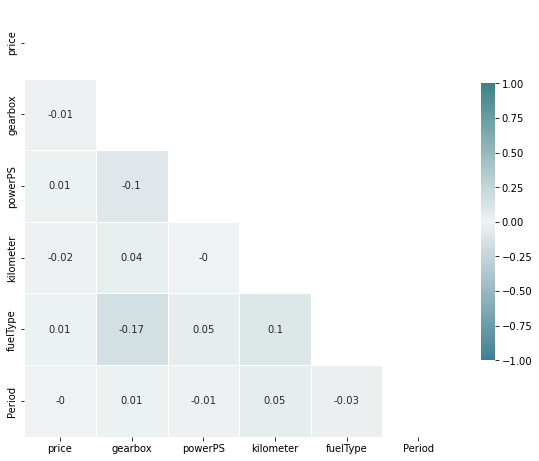

In [204]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f1, ax1 = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 200, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

## 6. Data Visualization

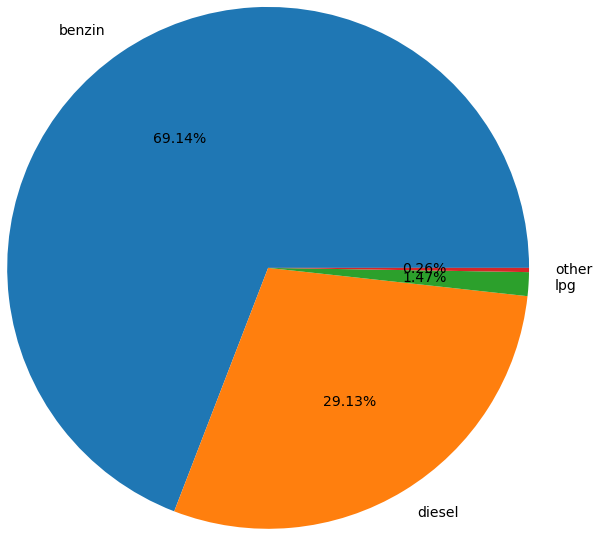

In [205]:
#Pie chart showing percentages of the fuel count
plt.rcParams['figure.figsize'] = (6,6)
fuel_values = df1['fuelType'].value_counts().values
plt.pie(fuel_values,labels=fuel_names,radius=2,autopct = '%1.2f%%',textprops={'fontsize': 14})
plt.show()

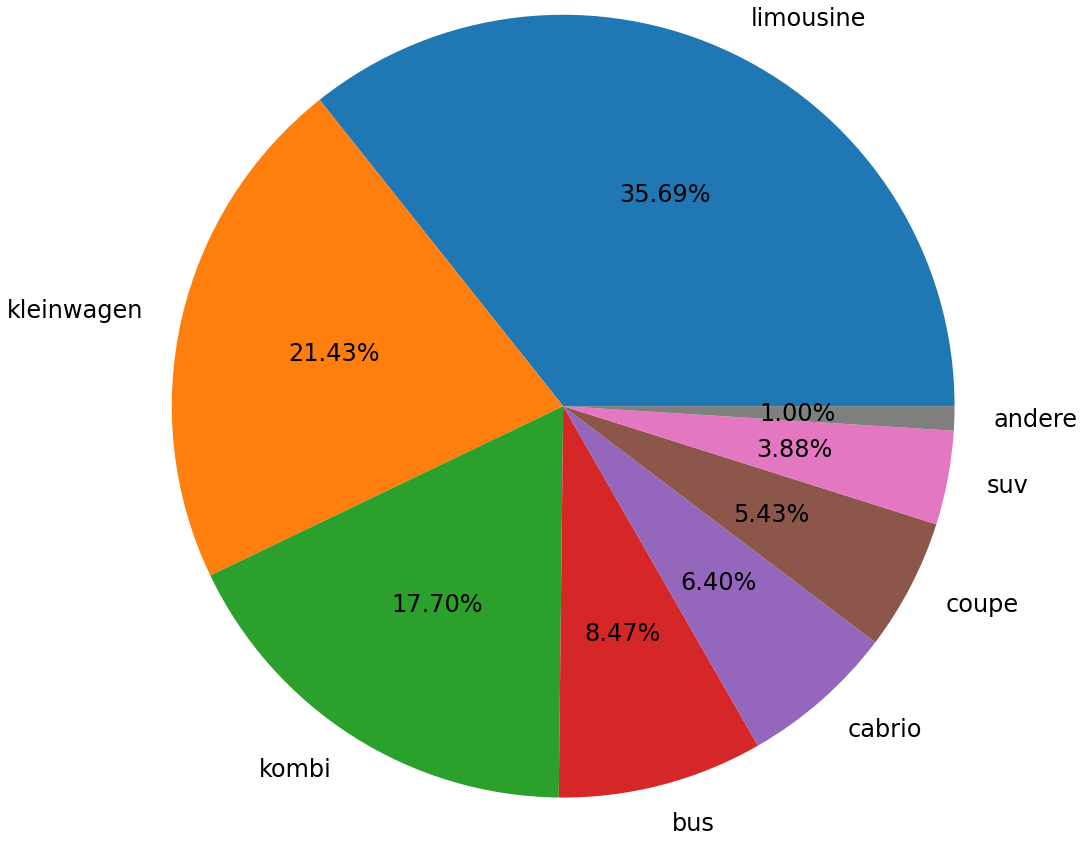

In [206]:
#Pie chart showing percentages of the vehicle Type
vehicle_names = df1['vehicleType'].value_counts().index
vehicle_values = df1['vehicleType'].value_counts().values
plt.pie(vehicle_values,labels=vehicle_names,radius=3,autopct = '%1.2f%%',textprops={'fontsize': 24})
plt.show()

<AxesSubplot:xlabel='fuelType', ylabel='vehicleType'>

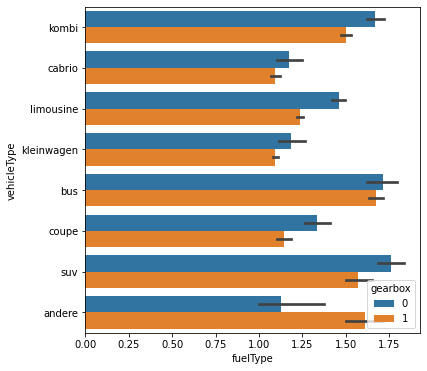

In [207]:
#Bar plot showing fuelType and vehicle count from gearbox type
sns.barplot('fuelType','vehicleType',hue='gearbox',data=df1)

In [208]:
#Brand-wise highest priced vehicle
brand_highest = df1.groupby('brand')['price'].max().sort_values(ascending=False)
brand_highest

brand
ford              12345678
sonstige_autos      285000
porsche             178000
mercedes_benz       120000
jaguar              110000
audi                 84000
volkswagen           78000
bmw                  54900
land_rover           41888
volvo                39450
alfa_romeo           34800
mitsubishi           34500
mazda                33990
chevrolet            29000
nissan               28888
jeep                 28350
kia                  27999
seat                 27999
chrysler             27900
skoda                26400
toyota               24550
opel                 24000
fiat                 23450
mini                 22900
peugeot              22850
hyundai              20990
renault              18900
citroen              18500
subaru               18444
suzuki               16000
smart                13500
dacia                12800
honda                12500
saab                  8900
trabant               7500
lancia                6300
lada                  

<AxesSubplot:xlabel='brand', ylabel='count'>

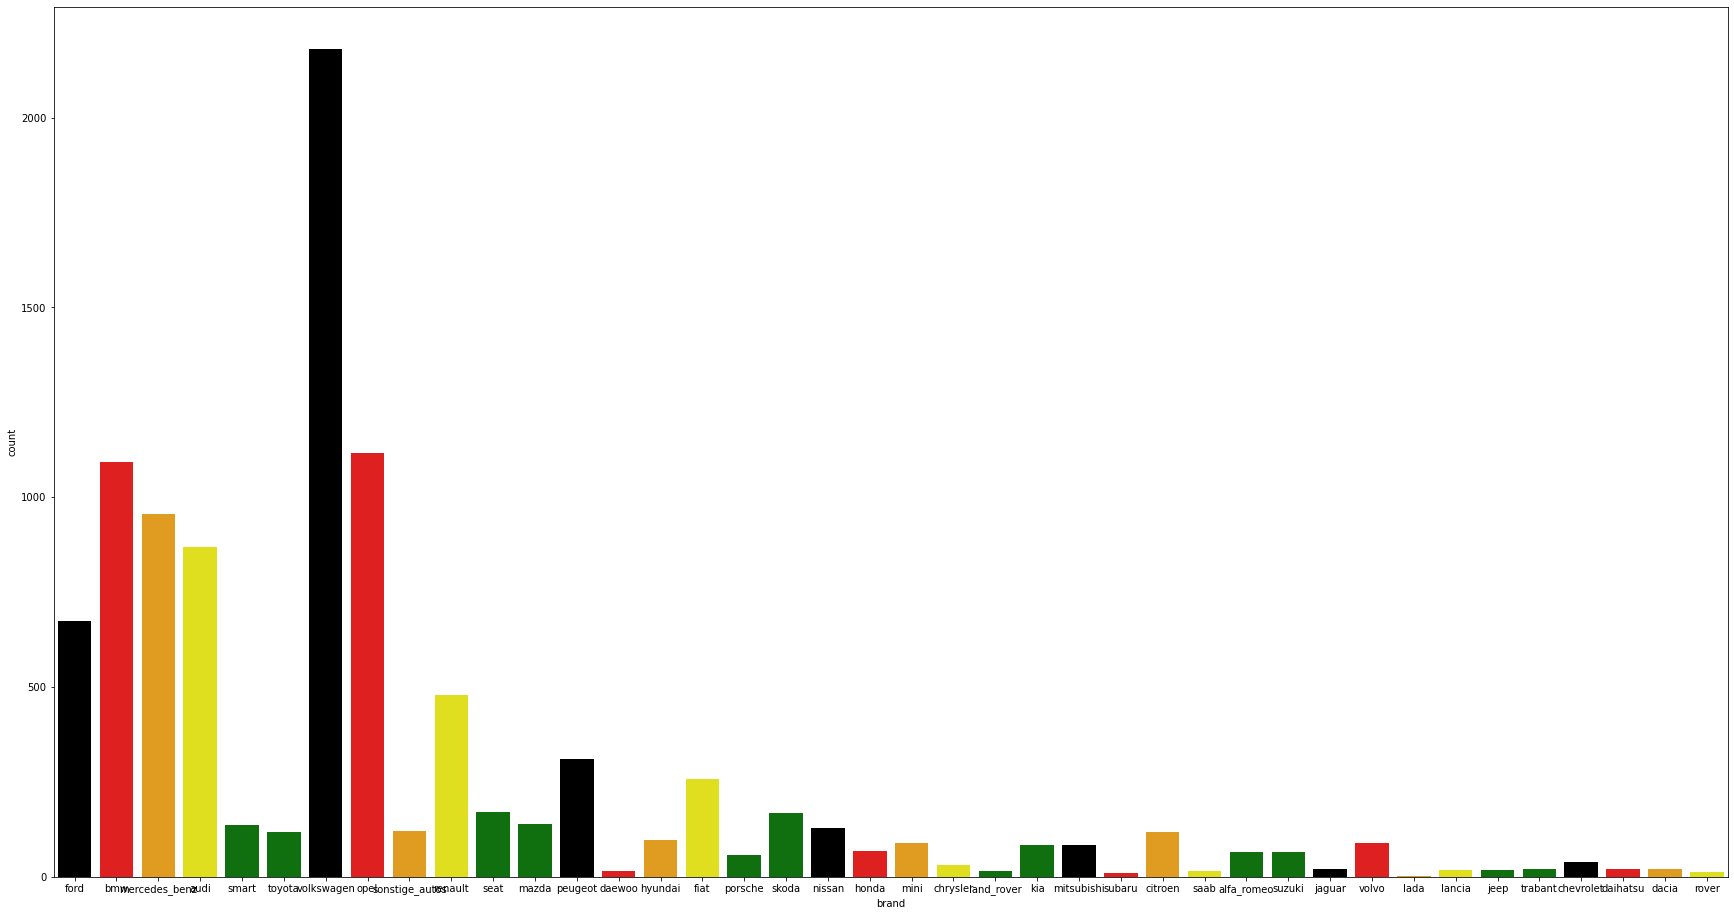

In [209]:
plt.rcParams['figure.figsize'] = (30,16) #count plot of different brands
sns.countplot(x='brand',data=df1,palette = ['Black','Red','Orange','Yellow','Green','Green']) #volkswagen count is highest

## Observations
- Volkswagen scored the highest number of cars released 
- For, Mercedes,BMW, Audi stand in the next few positions after first.
- They totally contribute to more than 50% of production 

## 7. Outlier Detection and dummy values

We need to perform outlier detection for power, price, kilometer, Period

In [210]:
max_price = df['price'].quantile(0.95)   #Checking the quartile of 0.95 and 0.05, filtering the values to bring the best model here. 
max_price 

19990.0

In [211]:
max_price,min_price = df1['price'].quantile([0.2,0.8])   #Considering the quartile of 0.95 and 0.05, filtering the values to bring the best model here. 
print(max_price,min_price)

900.0 8800.0


In [212]:
df1.groupby('price')['price'].count().sort_values(ascending = False) #Here, the last price is an outlier

price
0           308
1500        158
500         150
1200        128
1000        124
           ... 
10250         1
10300         1
10340         1
10350         1
12345678      1
Name: price, Length: 1215, dtype: int64

In [213]:
df2 = df1[~(df1['price']==12345678)]
df2.head()  #Removing the outlier data 

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,1,ford,kombi,30
1,3500,1,150,125000,1,bmw,cabrio,26
2,2200,1,150,150000,1,mercedes_benz,kombi,24
3,4000,1,0,150000,2,audi,limousine,16
4,2600,0,41,150000,2,smart,cabrio,20


There are three methods for Outlier detection. 
- Using Inter-quartile range
- Using z-score and standard deviation
- Using manual percentile values
The above used method is using manual percentile values. Lets try by the other two methods.

### Outlier detection using z-score and three std deviation

In [214]:
upper_limit = df2['price'].mean() + 3*df2['price'].std() #Using the 99.97% shuffle to remove outliers
lower_limit = df2['price'].mean() - 3*df2['price'].std()

In [215]:
lower_limit,upper_limit

(-22143.60918605582, 33789.0473298702)

In [216]:
df3 = df2[(df2['price']>lower_limit) & (df2['price']<upper_limit)]
df3.shape

(9882, 8)

In [217]:
df3 = df2[(df2['price']>lower_limit) & (df2['price']<upper_limit)]
df3.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,1,ford,kombi,30
1,3500,1,150,125000,1,bmw,cabrio,26
2,2200,1,150,150000,1,mercedes_benz,kombi,24
3,4000,1,0,150000,2,audi,limousine,16
4,2600,0,41,150000,2,smart,cabrio,20


In [218]:
df3['zscore'] = (df3.price - df3.price.mean())/(df3.price.std())
df3.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


In [219]:
df3[df3['zscore']<0].count()

price          6573
gearbox        6573
powerPS        6573
kilometer      6573
fuelType       6573
brand          6573
vehicleType    6573
Period         6573
zscore         6573
dtype: int64

In [220]:
df3[df3['zscore']>3].count()

price          230
gearbox        230
powerPS        230
kilometer      230
fuelType       230
brand          230
vehicleType    230
Period         230
zscore         230
dtype: int64

In [221]:
df4 = df3[~((df3['zscore']>3))]
df4.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


In [222]:
df4.shape

(9652, 9)

### Outlier detection using inter quartile range

In [223]:
q1, q3 = np.percentile(df4['price'], [20,80]) #From 20 percentile to 80 percentile
iqr = q3 - q1    #Inter quartile range from 20% and 80%
lower_limit = q1 - (1.5*iqr)
higher_limit = q3 + (1.5*iqr)

In [224]:
def outliers(data):                            #Getting the data found out in between 80% and 20%
    empty = []
    for i in data:
        if i < lower_limit or i > higher_limit:
            empty.append(i)
    print('The lower limit is: ',lower_limit)
    print('The higher limit is: ',higher_limit)
    print('The no of outliers are: ',len(empty))
    return empty


In [225]:
outliers(df2['price'])

The lower limit is:  -9677.5
The higher limit is:  18526.5
The no of outliers are:  592


[149500,
 19800,
 119900,
 25000,
 19500,
 27500,
 36900,
 62500,
 23500,
 22890,
 18700,
 24900,
 29900,
 37000,
 29350,
 48999,
 26800,
 29500,
 21900,
 18990,
 31900,
 54500,
 18600,
 54900,
 27500,
 26500,
 22500,
 19000,
 28500,
 21690,
 27999,
 39865,
 57500,
 27900,
 18699,
 21800,
 20500,
 20000,
 20900,
 20500,
 23770,
 20999,
 27900,
 39900,
 21800,
 34800,
 19999,
 23500,
 95000,
 20000,
 24999,
 18800,
 24888,
 54300,
 21800,
 27999,
 87991,
 41888,
 28500,
 24999,
 23000,
 178000,
 99990,
 23000,
 29500,
 18700,
 27900,
 26000,
 24999,
 25999,
 62900,
 18850,
 23000,
 24900,
 29500,
 18990,
 42500,
 39000,
 40000,
 33900,
 33000,
 19790,
 19900,
 18750,
 25000,
 19500,
 29500,
 19900,
 25900,
 20700,
 19900,
 27150,
 23500,
 24900,
 20000,
 19100,
 33900,
 26900,
 20900,
 20500,
 36499,
 30000,
 31250,
 22650,
 22950,
 19990,
 32000,
 39890,
 43000,
 46650,
 30400,
 21900,
 23500,
 22700,
 25420,
 25650,
 39500,
 19280,
 110000,
 19500,
 18900,
 20900,
 30500,
 26999,
 190

In [226]:
df5 = df4[~((df4['price']>higher_limit))]
df5.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


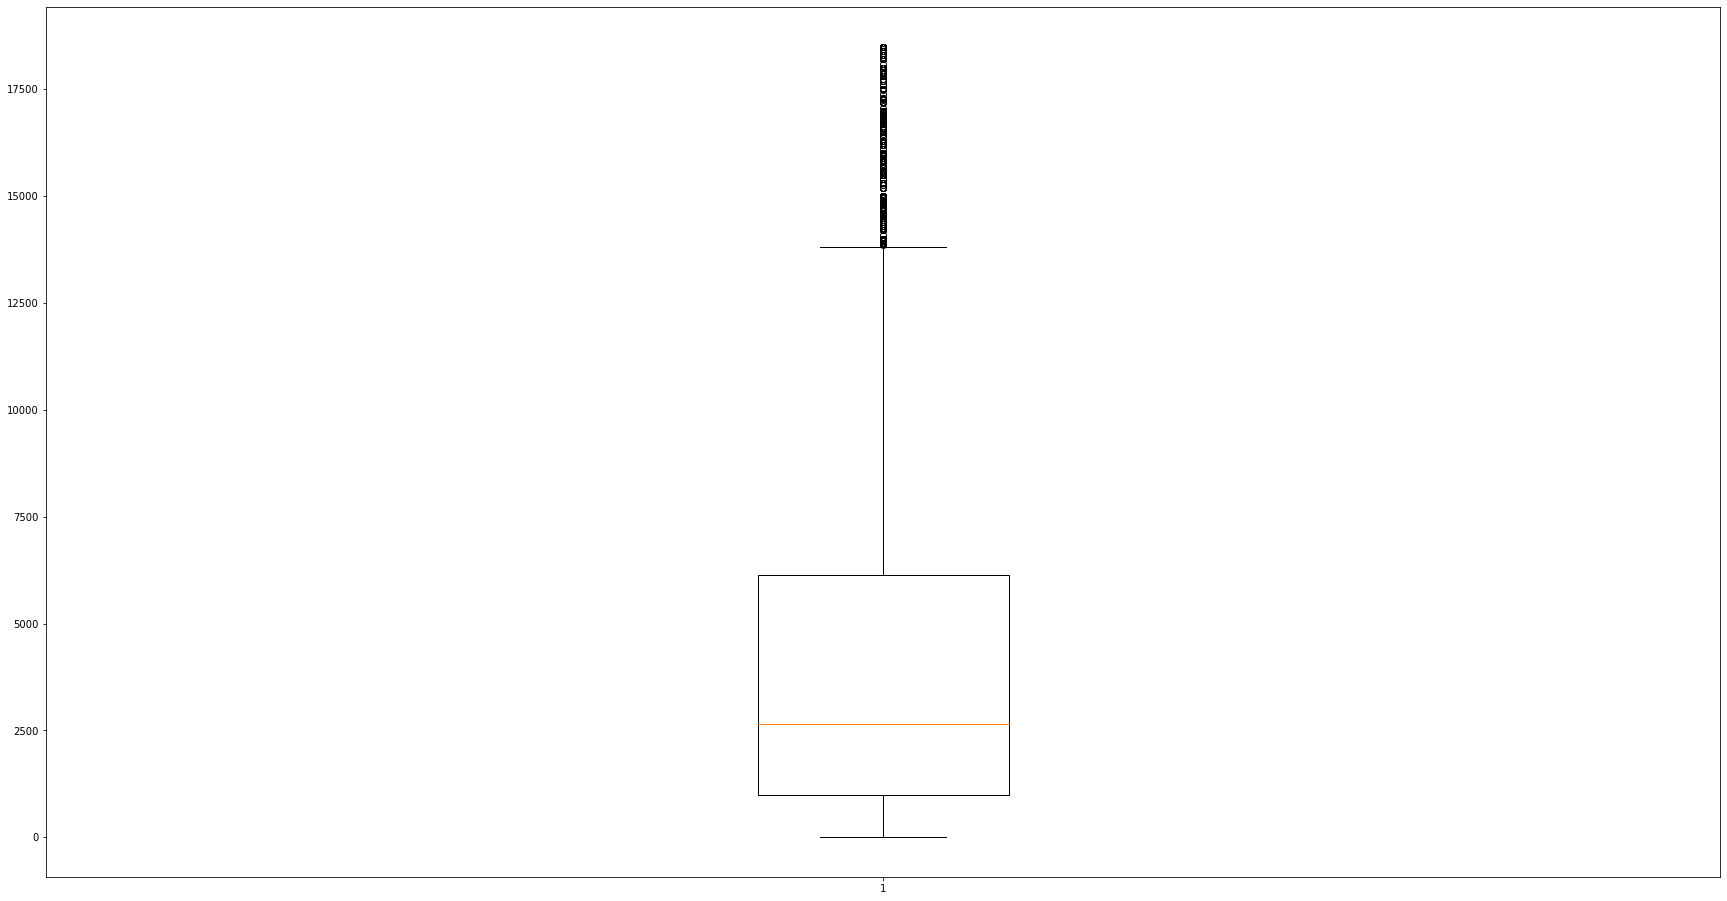

In [227]:
plt.boxplot(df5['price'])  #Boxplot executed to show the outliers
plt.show()

In [228]:
q1, q3 = np.percentile(df5['powerPS'], [20,80]) #From 20 percentile to 80 percentile
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
higher_limit = q3 + (1.5*iqr)

In [229]:
def outliers(data):
    empty = []
    for i in data:
        if i < lower_limit or i > higher_limit:
            empty.append(i)
    print('The lower limit is: ',lower_limit)
    print('The higher limit is: ',higher_limit)
    print('The no of outliers are: ',len(empty))
    return empty

In [230]:
outliers(df5['powerPS'])

The lower limit is:  -75.0
The higher limit is:  285.0
The no of outliers are:  119


[1256,
 306,
 333,
 320,
 343,
 305,
 350,
 306,
 286,
 306,
 952,
 329,
 299,
 299,
 1598,
 310,
 400,
 450,
 340,
 380,
 326,
 354,
 286,
 306,
 900,
 333,
 286,
 13636,
 348,
 333,
 6012,
 540,
 333,
 330,
 292,
 9012,
 306,
 380,
 299,
 1200,
 11509,
 343,
 500,
 310,
 387,
 333,
 320,
 301,
 375,
 305,
 387,
 300,
 286,
 286,
 299,
 306,
 333,
 334,
 1922,
 329,
 306,
 344,
 286,
 1005,
 313,
 320,
 306,
 344,
 1000,
 306,
 340,
 12510,
 306,
 286,
 306,
 306,
 299,
 286,
 10910,
 580,
 306,
 286,
 286,
 306,
 292,
 286,
 300,
 305,
 320,
 306,
 333,
 299,
 300,
 306,
 298,
 286,
 354,
 299,
 340,
 10912,
 340,
 306,
 340,
 306,
 299,
 344,
 325,
 286,
 435,
 310,
 300,
 326,
 299,
 333,
 286,
 299,
 387,
 290,
 292]

In [231]:
df6 = df5[~((df5['powerPS']>higher_limit))]
df6.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


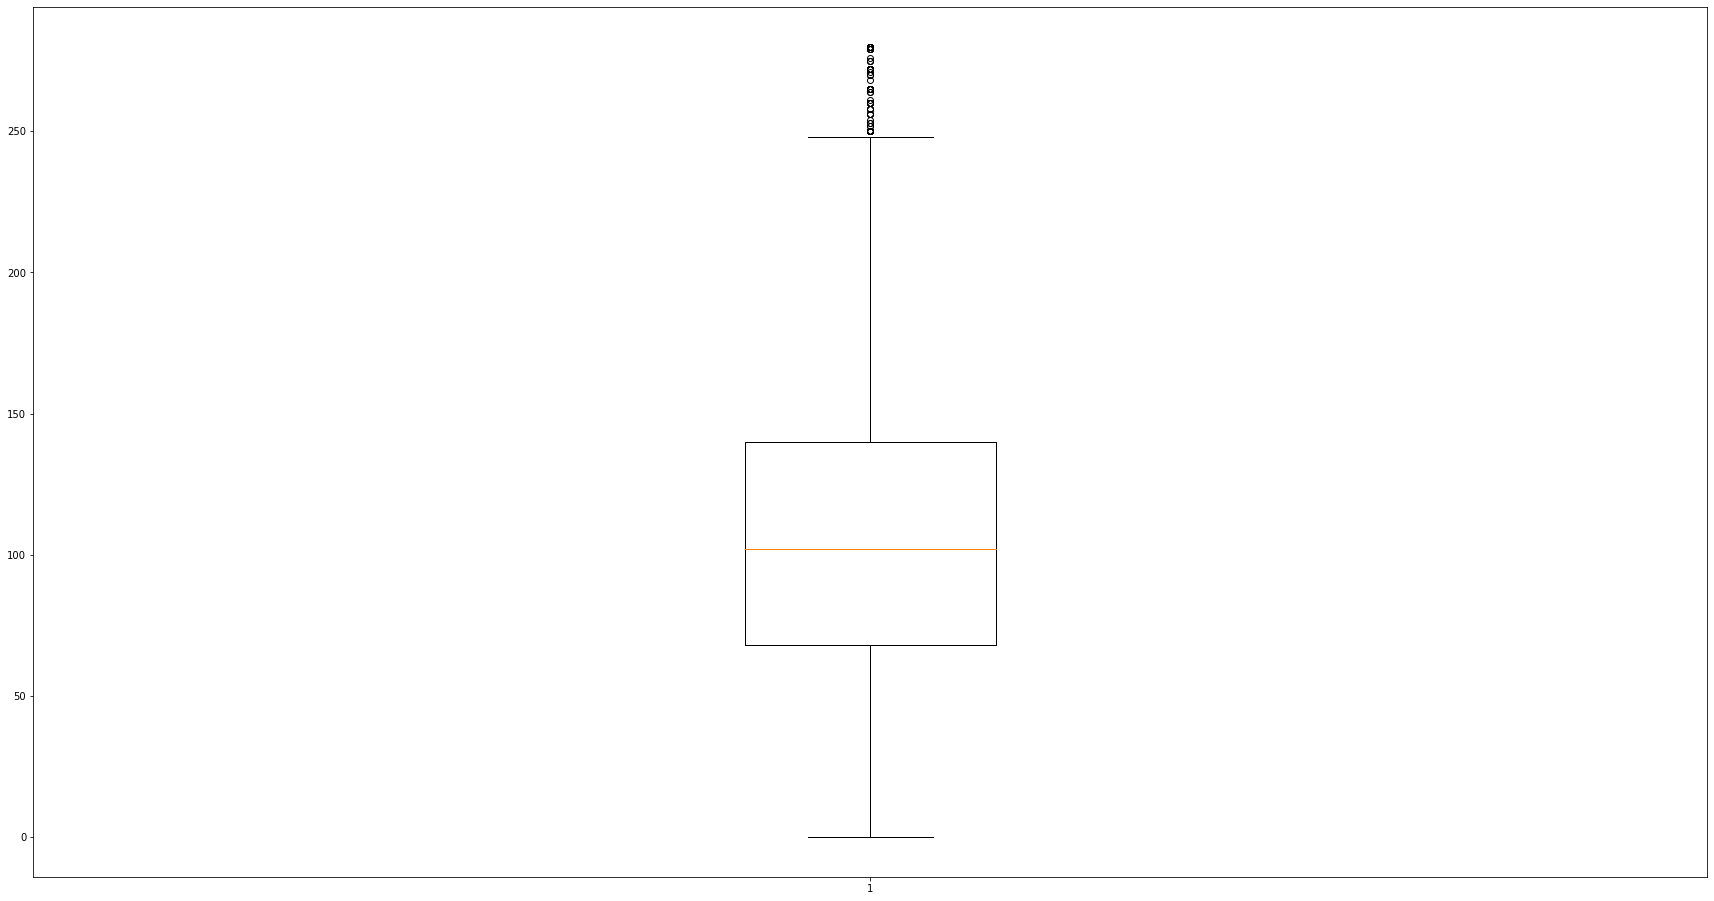

In [232]:
plt.boxplot(df6['powerPS'])
plt.show()

In [233]:
q1, q3 = np.percentile(df6['kilometer'], [20,80]) #From 20 percentile to 80 percentile
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
higher_limit = q3 + (1.5*iqr)

In [234]:
def outliers(data):
    empty = []
    for i in data:
        if i < lower_limit or i > higher_limit:
            empty.append(i)
    print('The lower limit is: ',lower_limit)
    print('The higher limit is: ',higher_limit)
    print('The no of outliers are: ',len(empty))
    return empty

In [235]:
outliers(df6['kilometer'])

The lower limit is:  25000.0
The higher limit is:  225000.0
The no of outliers are:  319


[5000,
 5000,
 20000,
 20000,
 5000,
 20000,
 5000,
 20000,
 5000,
 5000,
 5000,
 20000,
 5000,
 5000,
 10000,
 5000,
 10000,
 10000,
 5000,
 5000,
 20000,
 20000,
 20000,
 5000,
 5000,
 5000,
 20000,
 5000,
 20000,
 5000,
 20000,
 5000,
 5000,
 5000,
 20000,
 5000,
 5000,
 20000,
 20000,
 20000,
 20000,
 20000,
 5000,
 20000,
 20000,
 5000,
 20000,
 10000,
 5000,
 10000,
 5000,
 20000,
 5000,
 20000,
 5000,
 5000,
 20000,
 5000,
 5000,
 5000,
 5000,
 5000,
 10000,
 5000,
 20000,
 5000,
 5000,
 5000,
 5000,
 20000,
 5000,
 20000,
 5000,
 20000,
 20000,
 5000,
 5000,
 5000,
 20000,
 5000,
 10000,
 20000,
 10000,
 20000,
 20000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 10000,
 10000,
 5000,
 20000,
 10000,
 20000,
 20000,
 10000,
 5000,
 5000,
 20000,
 5000,
 10000,
 20000,
 20000,
 20000,
 5000,
 5000,
 5000,
 20000,
 20000,
 5000,
 20000,
 5000,
 20000,
 20000,
 10000,
 5000,
 5000,
 20000,
 20000,
 5000,
 20000,
 5000,
 5000,
 20000,
 10000,
 10000,
 5000,
 20000,
 5000,
 5000,
 200

In [236]:
df7 = df6[~((df6['kilometer']>higher_limit))]
df7.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


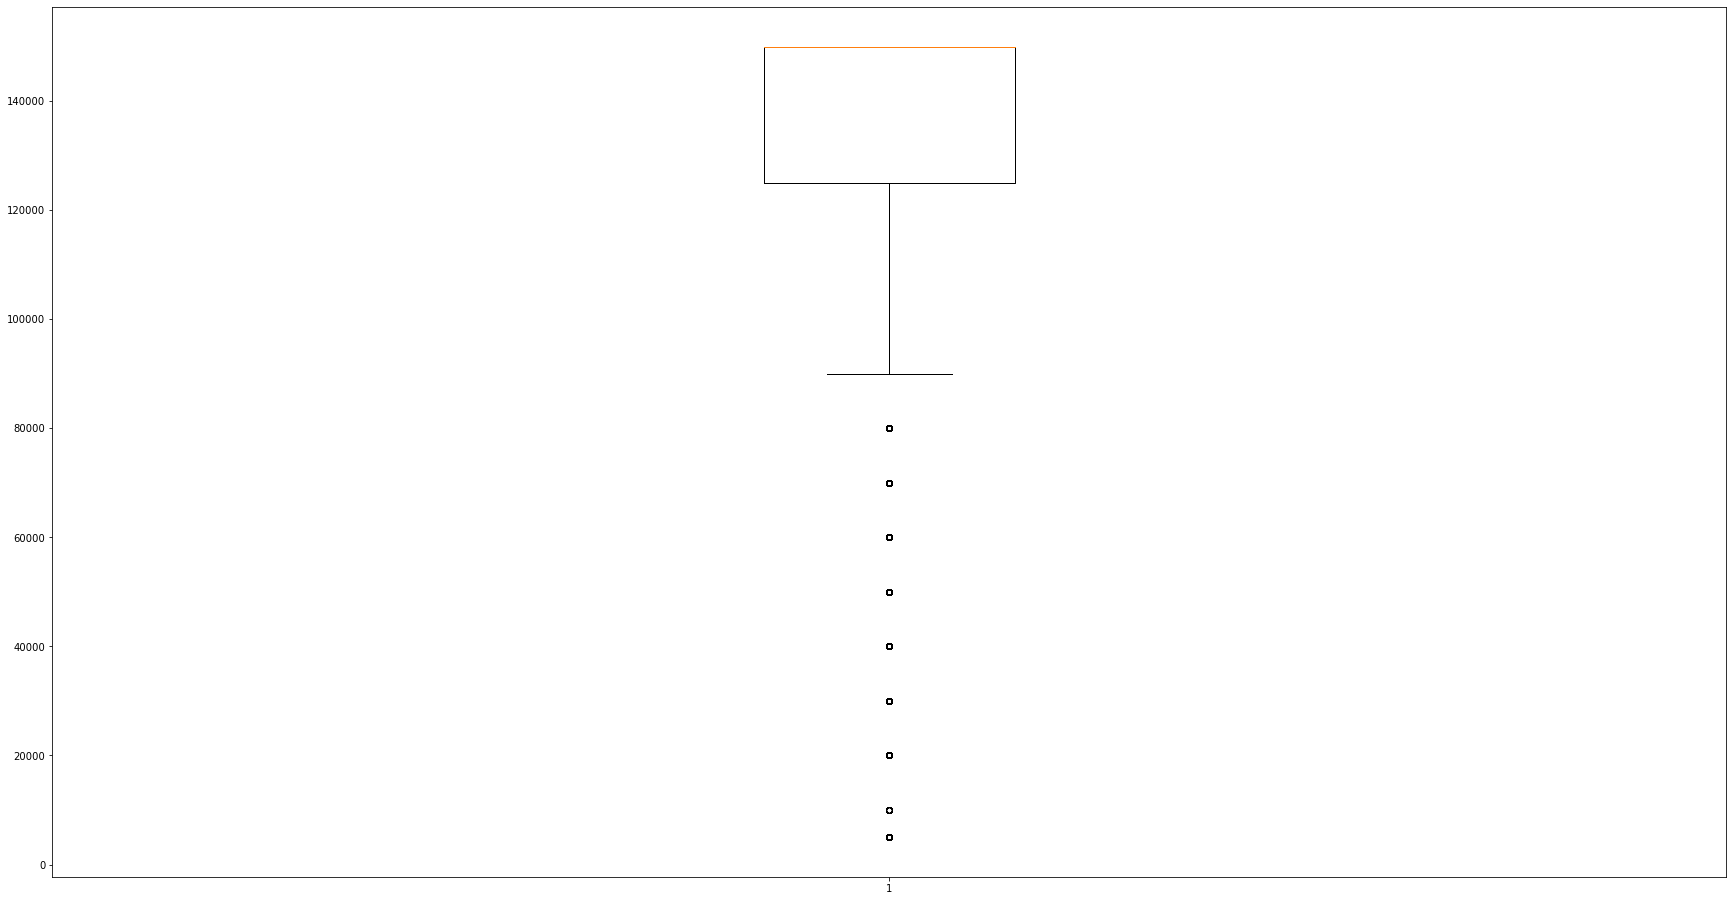

In [237]:
plt.boxplot(df7['kilometer'])
plt.show()

In [238]:
q1, q3 = np.percentile(df7['Period'], [20,80]) #From 20 percentile to 80 percentile
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
higher_limit = q3 + (1.5*iqr)

In [239]:
def outliers(data):
    empty = []
    for i in data:
        if i < lower_limit or i > higher_limit:
            empty.append(i)
    print('The lower limit is: ',lower_limit)
    print('The higher limit is: ',higher_limit)
    print('The no of outliers are: ',len(empty))
    return empty

In [240]:
outliers(df7['Period'])

The lower limit is:  -3.5
The higher limit is:  40.5
The no of outliers are:  111


[43,
 47,
 44,
 46,
 43,
 44,
 42,
 69,
 41,
 42,
 61,
 52,
 86,
 45,
 58,
 55,
 52,
 42,
 52,
 57,
 41,
 55,
 45,
 41,
 53,
 56,
 62,
 44,
 41,
 44,
 57,
 41,
 44,
 56,
 56,
 69,
 44,
 43,
 47,
 44,
 420,
 54,
 62,
 50,
 53,
 62,
 788,
 52,
 42,
 42,
 69,
 42,
 62,
 45,
 53,
 46,
 52,
 48,
 42,
 51,
 42,
 42,
 56,
 61,
 112,
 52,
 1022,
 -2978,
 55,
 42,
 56,
 47,
 41,
 42,
 61,
 52,
 44,
 54,
 41,
 60,
 50,
 52,
 58,
 49,
 61,
 43,
 50,
 112,
 42,
 42,
 112,
 42,
 41,
 43,
 44,
 62,
 56,
 42,
 44,
 64,
 43,
 67,
 49,
 42,
 62,
 41,
 43,
 41,
 42,
 41,
 52]

In [241]:
df8 = df7[~((df7.Period > higher_limit) | (df7.Period < lower_limit))]
df8.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


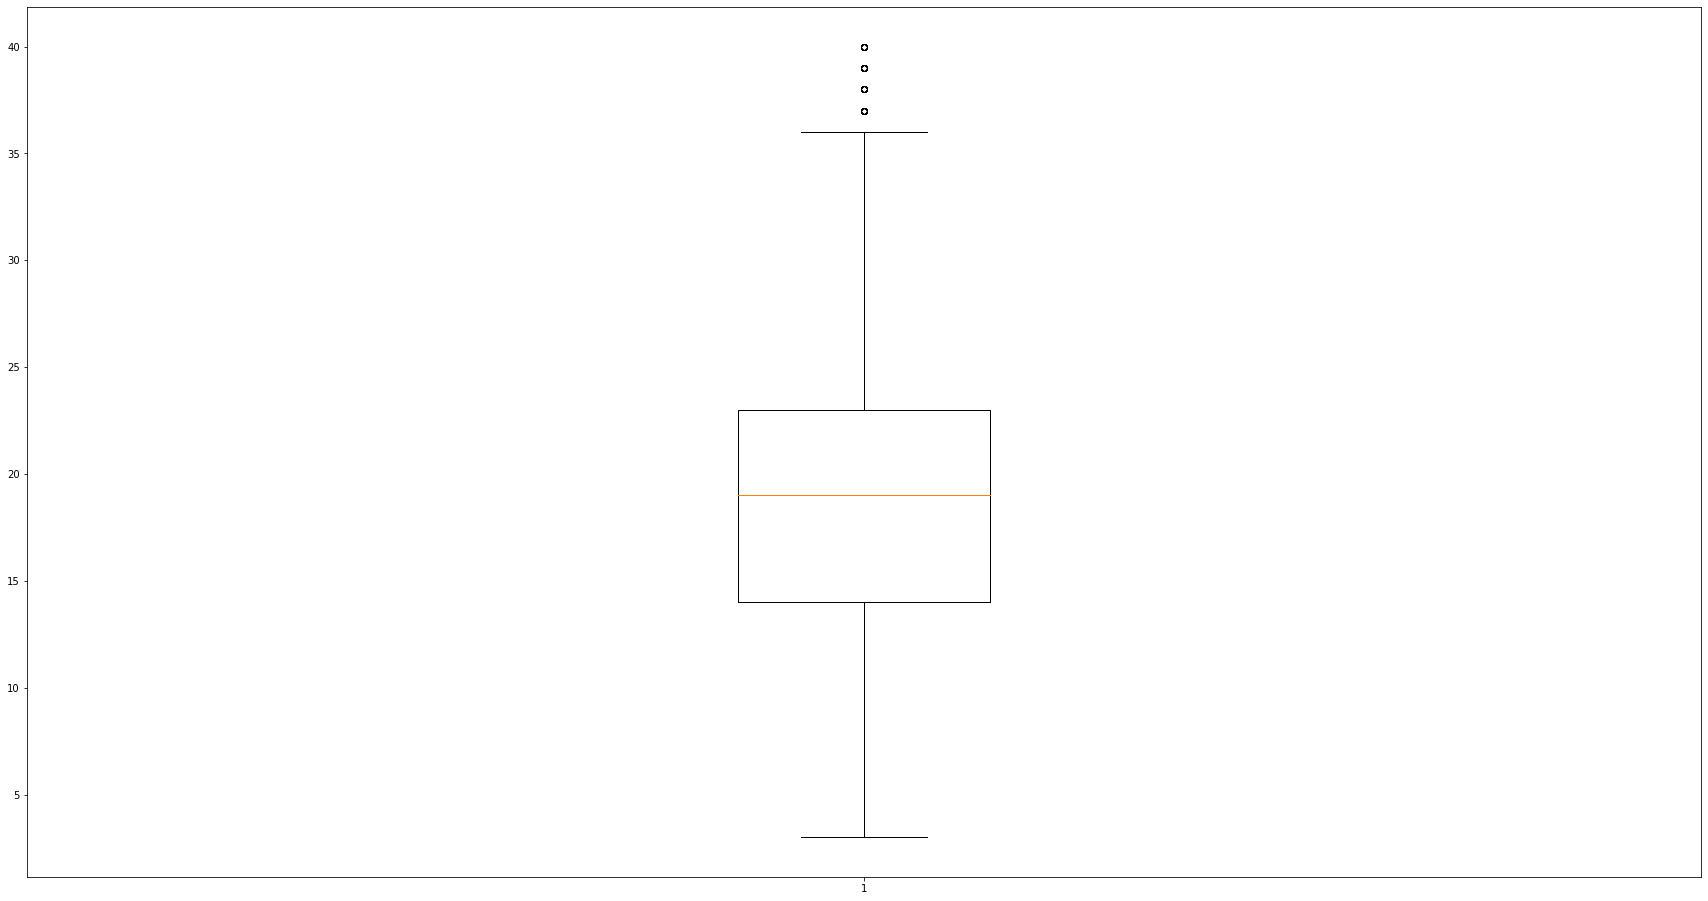

In [242]:
plt.boxplot(df8['Period'])
plt.show()

In [243]:
df9 = df8[~(df8['price']<200)]
df9.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,zscore
0,400,1,89,60000,1,ford,kombi,30,-0.804729
1,3500,1,150,125000,1,bmw,cabrio,26,-0.284926
2,2200,1,150,150000,1,mercedes_benz,kombi,24,-0.502908
3,4000,1,0,150000,2,audi,limousine,16,-0.201087
4,2600,0,41,150000,2,smart,cabrio,20,-0.435837


In [244]:
df9.drop('zscore',axis=1,inplace=True)
df9.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period
0,400,1,89,60000,1,ford,kombi,30
1,3500,1,150,125000,1,bmw,cabrio,26
2,2200,1,150,150000,1,mercedes_benz,kombi,24
3,4000,1,0,150000,2,audi,limousine,16
4,2600,0,41,150000,2,smart,cabrio,20


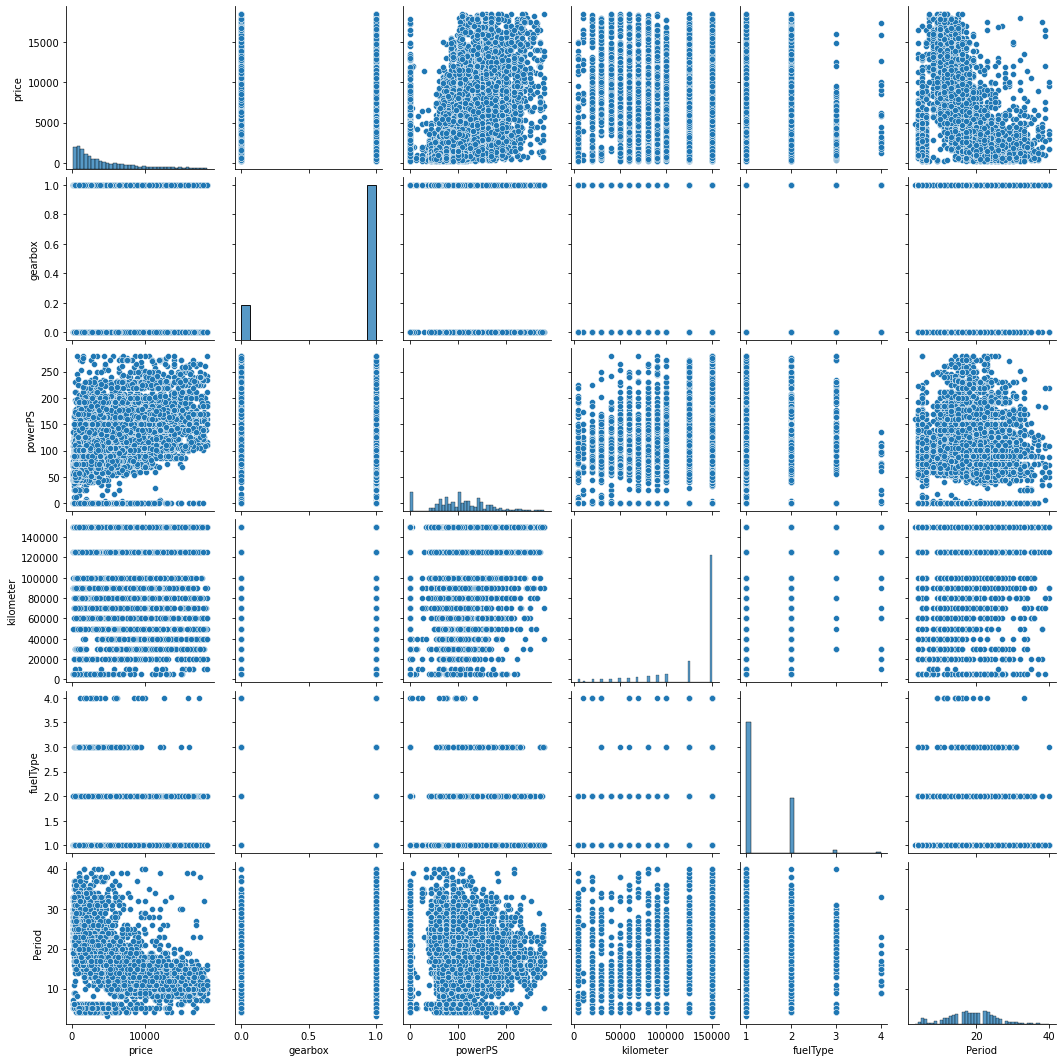

In [245]:
cols = df9.columns   #Pairplot checking the relationship with features 
sns.pairplot(data=df9[cols], palette='RdBu')
plt.show()

In [246]:
df10 = df9[~(df9['powerPS']<30)]

In [247]:
dummies1 = pd.get_dummies(df10['brand'],drop_first=True)   #Convert all the features to dummies 
dummies2 = pd.get_dummies(df10['vehicleType'],drop_first=True)
dummies3 = pd.get_dummies(df10['fuelType'],drop_first=True)
dummies4 = pd.get_dummies(df10['gearbox'],drop_first=True)

In [248]:
df11 = pd.concat([df10,dummies1,dummies2,dummies3,dummies4],axis='columns')
df11.head()

,price,gearbox,powerPS,kilometer,fuelType,brand,vehicleType,Period,audi,bmw,...,cabrio,coupe,kleinwagen,kombi,limousine,suv,2,3,4,1
0,400,1,89,60000,1,ford,kombi,30,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3500,1,150,125000,1,bmw,cabrio,26,0,1,...,1,0,0,0,0,0,0,0,0,1
2,2200,1,150,150000,1,mercedes_benz,kombi,24,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2600,0,41,150000,2,smart,cabrio,20,0,0,...,1,0,0,0,0,0,1,0,0,0
5,2222,1,143,150000,1,bmw,limousine,21,0,1,...,0,0,0,0,1,0,0,0,0,1


In [249]:
df12 = df11.drop(['gearbox', 'fuelType', 'brand','vehicleType'],axis='columns')
df12.head()

,price,powerPS,kilometer,Period,audi,bmw,chevrolet,chrysler,citroen,dacia,...,cabrio,coupe,kleinwagen,kombi,limousine,suv,2,3,4,1
0,400,89,60000,30,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3500,150,125000,26,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2200,150,150000,24,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2600,41,150000,20,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,2222,143,150000,21,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [250]:
X = df12.drop('price',axis=1)
X.shape

(7828, 53)

In [251]:
y = df12['price']
y.shape

(7828,)

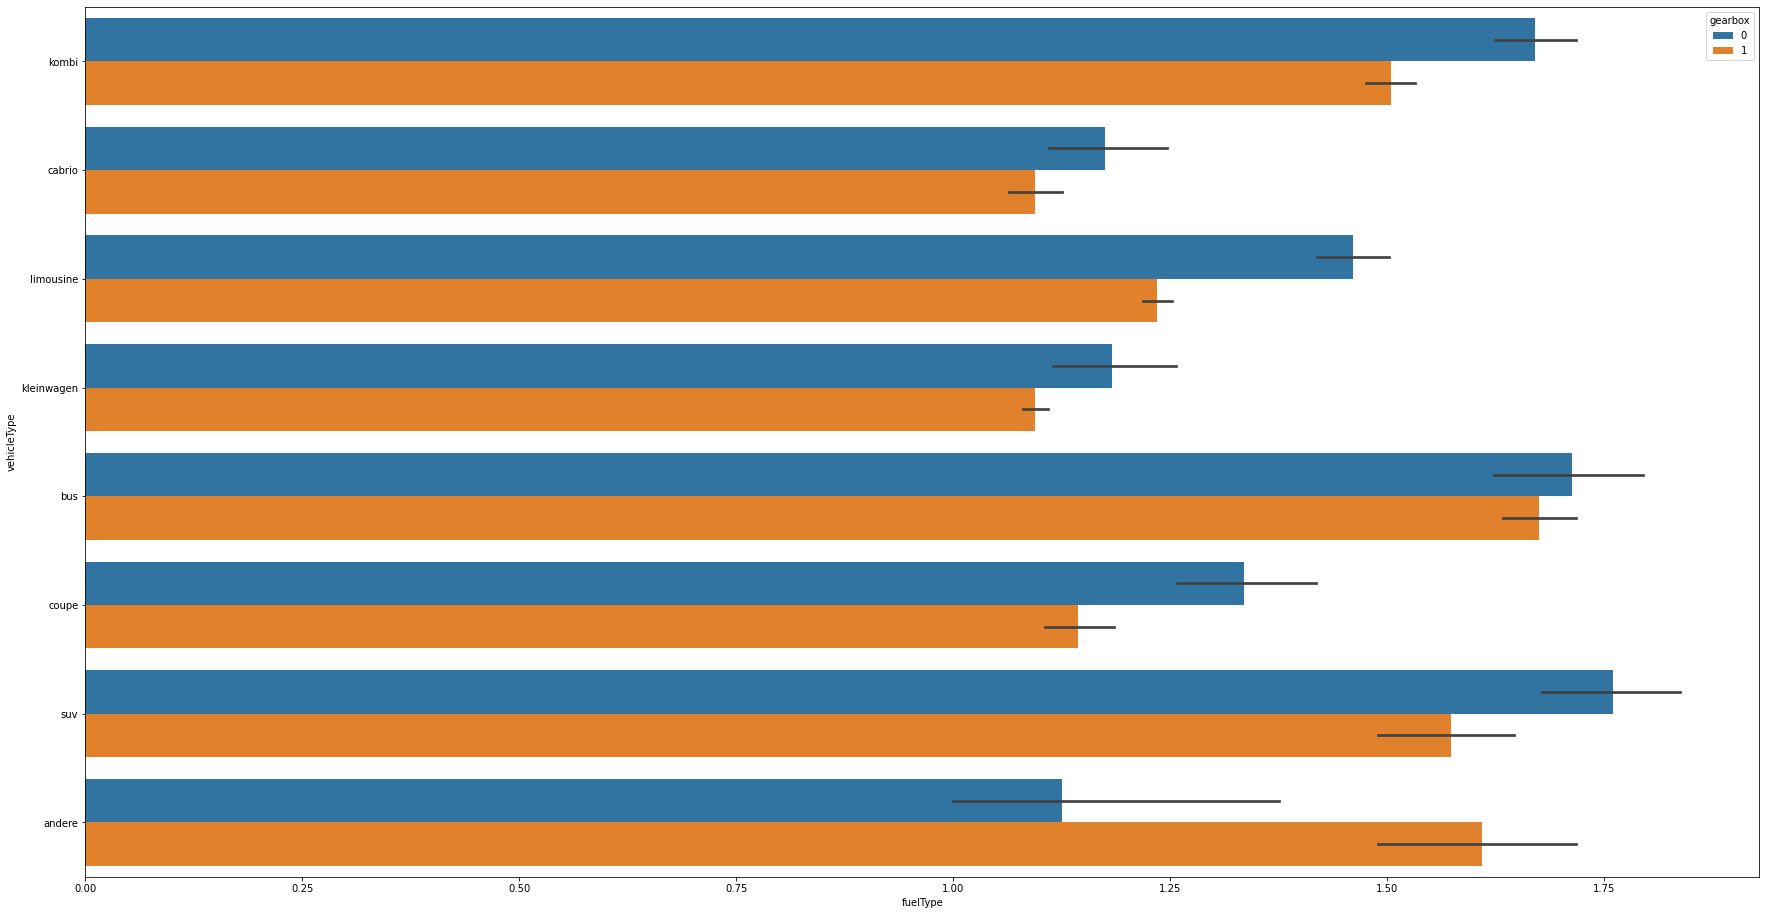

In [252]:
sns.barplot('fuelType','vehicleType',hue='gearbox',data=df1)
plt.show()

## 7.Model evaluation and testing

In [253]:
from sklearn.model_selection import train_test_split         #train data and test data is split 
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [254]:
from sklearn.linear_model import LinearRegression   
lr = LinearRegression()
lr.fit(X_train,y_train)
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
print('Training score: {}, Testing score: {}'.format(train_score,test_score))

Training score: 0.6473638479166539, Testing score: 0.6352895487242043


Using Linear Regression, The training data accuracy is 0.65 and the testing data accuracy is 0.64.
Its the way to improve the model using several methods

In [255]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv) #Cross validating the different sets of data without the repetition taking place in this and the accuraceis are checked.

array([0.6541435 , 0.64421095, 0.64856679, 0.65642443, 0.63156404,
       0.62415166, 0.63124002])

#### We are using GridSearchCV to perform different models and getting scores. Linear Regression, Lasso, Ridge, Random Forest, Decision tree.

In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def best_model_using_GridSearchCV(X,y):
    algorithms = {
        'linear_regression':{
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }
        },
        'Lasso' : {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random','cyclic']
            }
        },
         'Ridge':{
            'model' : Ridge(),
            'params' : {
                'alpha': [1,10]
            }
        },
        'random_forest':{
            'model' : RandomForestRegressor(),
            'params':{
                'n_estimators':[1,5,10]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=7, test_size=0.2, random_state=0)
    for algorithm_name, configuration in algorithms.items():
        gs = GridSearchCV(configuration['model'],configuration['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algorithm_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_using_GridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.641472,{'normalize': False}
1,Lasso,0.641593,"{'alpha': 1, 'selection': 'random'}"
2,Ridge,0.641906,{'alpha': 10}
3,random_forest,0.805622,{'n_estimators': 10}
4,decision_tree,0.693893,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### From the above model, It is seen that Rondom forest gives the highest accuracy with 80% nearly.

In [267]:
y_pred = lr.predict(X_test)
print(y_pred,y_test)

[ 3045.9521482  10357.19689122  5075.49047165 ...  7778.21399733
 10961.60610955  7234.509949  ] 3685     2600
159     10900
4063     3350
6073     7700
5617     5999
        ...  
1961      650
1751     1400
8761     5800
4264    15000
4263     5250
Name: price, Length: 1566, dtype: int64


In [259]:
#Performance Metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred1 = lr.predict(X_test)
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y) 
y_pred2 = regressor.predict(X_test)
rmse1 = sqrt(mean_squared_error(y_test,y_pred1))
rmse2 = sqrt(mean_squared_error(y_test,y_pred2))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred1)
adj_r2 =1-float(len(y)-1) / (len(lr.coef_)-1)*(1-r2)
display(rmse1)
display(r2)
display(adj_r2)
display(lr.coef_)
display(lr.intercept_)

2616.950427888859

0.6352895487242043

-53.89593657953179

array([ 3.70606166e+01, -4.23362313e-02, -2.32496743e+02,  2.05066651e+03,
        2.01028513e+03,  8.40916541e+02, -2.04913675e+03, -1.88287294e+01,
       -1.07290749e+02, -9.28263521e+02,  2.95147371e+02,  1.89392968e+02,
        3.78399902e+02,  1.21763502e+03, -1.00281770e+02, -6.92612276e+02,
       -8.16553433e+02, -7.46570651e+02, -3.32281158e+03,  7.35419058e+02,
        7.06092879e+02,  4.06784640e+02,  1.57753001e+03,  2.86915309e+03,
       -1.99080214e+01,  8.41381402e+02,  4.50359293e+02, -9.00221296e+01,
        2.84445589e+03,  4.82931833e+01, -1.50078741e+02,  1.56122387e+03,
        1.40140465e+03,  1.45147407e+03, -7.52361788e+01,  7.43974976e+02,
        1.02613287e+03,  1.09674170e+03,  1.19420956e+03, -7.65059338e+03,
        1.95457955e+03,  8.91743273e+02,  2.13569052e+02,  1.18023563e+03,
        1.41933009e+00, -1.74879378e+02, -9.91174293e+02, -1.25694592e+03,
        1.30473891e+03,  1.54858635e+03, -2.33573316e+02,  1.03712114e+03,
       -1.67294396e+02])

8988.941109726913

In [261]:
# 6. Apply Variance Inflation Factors calculation and find if the model built has collinearity between different variables
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,14.505872,powerPS
1,17.271222,kilometer
2,12.315936,Period
3,7.526802,audi
4,9.271576,bmw
5,1.214545,chevrolet
6,1.264225,chrysler
7,1.821966,citroen
8,1.185390,dacia
9,1.130871,daewoo


                                                                                         Thank You